<a href="https://colab.research.google.com/github/tamilselvan-sde/colab/blob/main/MNIST_Handwritten_digit_classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


### Loading the mnist data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
type(X_train)

numpy.ndarray

### shape of data's


In [ ]:
print(X_train.shape, "-",y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) - (60000,) (10000, 28, 28) (10000,)


### printing  10th image

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(X_train[0].shape)

(28, 28)


### displaying images

0


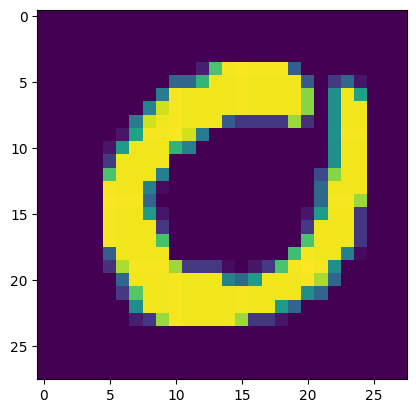

In [ ]:
plt.imshow(X_train[121])
plt.show

print(y_train[121])

In [ ]:
print(y_train.shape , y_test.shape)

(60000,) (10000,)


### Unique values in y_train



In [ ]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Scaling the values

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
print(X_train[0].shape)

(28, 28)


## Building neural networks

In [ ]:
# Setting up the layer of neural networks

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(10, activation='softmax')



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compileing nn

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the neural network

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8429 - loss: 0.5042
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9576 - loss: 0.1410
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9691 - loss: 0.1016
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9742 - loss: 0.0828
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0678
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0609
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9843 - loss: 0.0496
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0452
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9859 - loss: 0.0436
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0371
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0328
Epoch 12/20
1875/1875 ━━━━━━━

### traing data accuracy is 99%

#Accuray on test datasets

In [ ]:
loss ,  accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1626


# Test data accuracy is 96%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


### 1st dataset in x_test

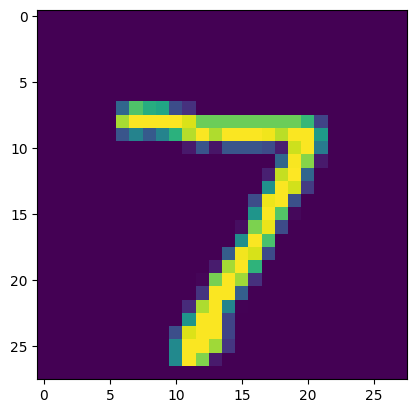

7


In [ ]:
plt.imshow(X_test[0])
plt.show()

print(y_test[0])

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([2.4105119e-11, 5.2376437e-09, 6.5836725e-10, 4.0309679e-08,
       2.4189524e-07, 1.0890139e-10, 5.9591275e-14, 9.9998099e-01,
       4.2968110e-10, 1.8741302e-05], dtype=float32)

In [ ]:
# converting prediction probabilities into class label

In [ ]:
label_for_first_test = np.argmax(y_pred[0])
label_for_first_test

7

In [ ]:
# for all test label

In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels

y_pred --->  Predicted labels

#Confusion matric

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_label)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    2,    5,    0,    2,    3],
       [   0, 1128,    1,    1,    0,    0,    2,    1,    2,    0],
       [   5,    3, 1005,    5,    2,    1,    2,    4,    4,    1],
       [   0,    0,    4,  988,    0,    5,    0,    5,    3,    5],
       [   0,    0,    6,    0,  960,    1,    3,    0,    1,   11],
       [   3,    0,    2,   12,    3,  865,    1,    0,    6,    0],
       [   2,    2,    1,    0,    6,   10,  935,    0,    2,    0],
       [   1,    3,   14,    6,    4,    0,    0,  979,    4,   17],
       [   4,    1,    4,    6,    8,    4,    0,    3,  941,    3],
       [   1,    1,    1,    7,   10,    6,    0,    1,    4,  978]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted labels')

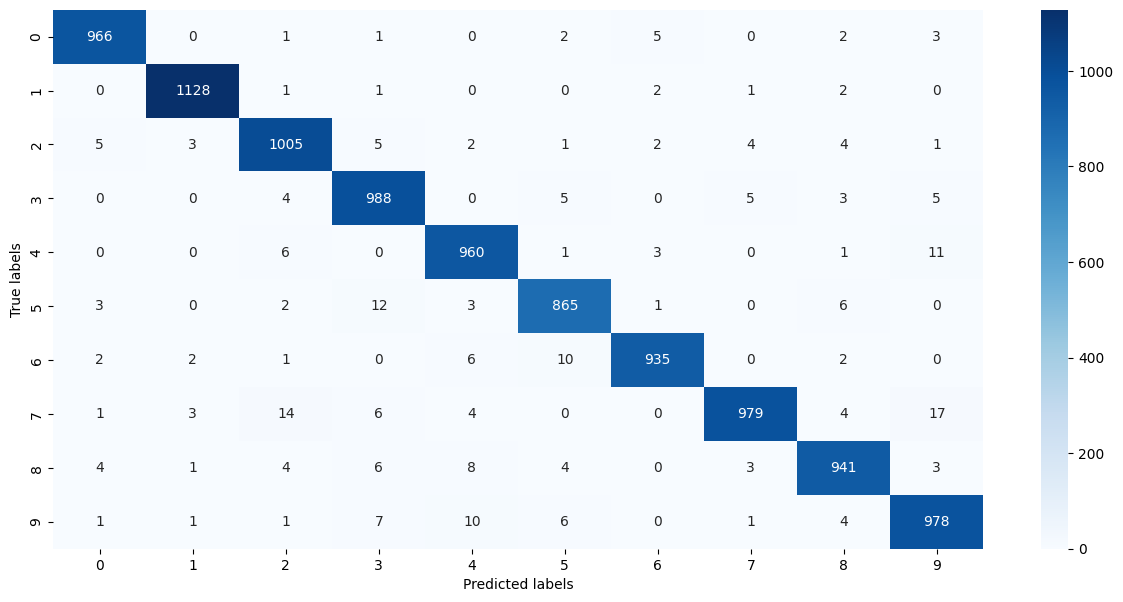

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')


# building predictive system

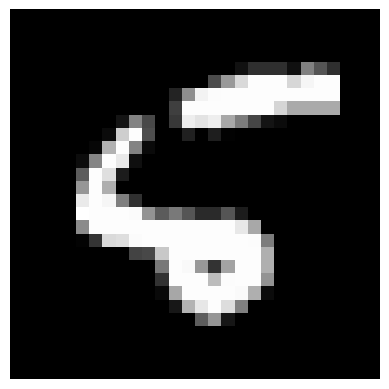

In [114]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display and save the first test image
plt.imshow(x_test[8], cmap='gray')
plt.axis('off')  # Turn off axis for a cleaner image

# Save the image as a 318x318 PNG file
plt.savefig('/content/sample_data/mnist_image_318x318.png', dpi=318/28, bbox_inches='tight', pad_inches=0)
plt.show()


In [115]:
input_image = cv2.imread('/content/sample_data/mnist_image_318x318.png', cv2.IMREAD_GRAYSCALE)

In [116]:
type(input_image)

numpy.ndarray

In [117]:
print(input_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


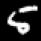

In [118]:
cv2_imshow(input_image)

In [119]:
input_image.shape

(41, 41)

In [120]:
# resize
input_image_resize = cv2.resize(input_image, (28,28))

In [121]:
# resize
input_image_resize.shape

(28, 28)

In [122]:
cv2_imshow(input_image_resize)

In [123]:
# resize by 255
input_image_resize = input_image_resize/255

In [124]:
# reshape
input_reshape = np.reshape(input_image_resize, [1,28,28])

In [125]:
input_predict = model.predict(input_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [126]:
input_predict

array([[2.4736703e-23, 4.3312036e-23, 1.1043659e-17, 9.2190402e-21,
        5.4036682e-17, 9.9871397e-01, 1.2647720e-03, 5.4925057e-27,
        2.1257174e-05, 5.3611466e-13]], dtype=float32)

In [127]:
input_pred_lable= np.argmax(input_predict)

In [128]:
# final output of the handwritten is
input_pred_lable

5